In [15]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import scipy

# Load data

In [26]:
gender = pandas.read_csv('./data/gender_submission.csv')
test = pandas.read_csv('./data/test.csv')
train = pandas.read_csv('./data/train.csv')
gt = train['Survived']
train = train.drop(columns='Survived')

In [27]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Inspect data

In [17]:
# Check for NaN
# NaN columns
print(train.isna().any())


PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


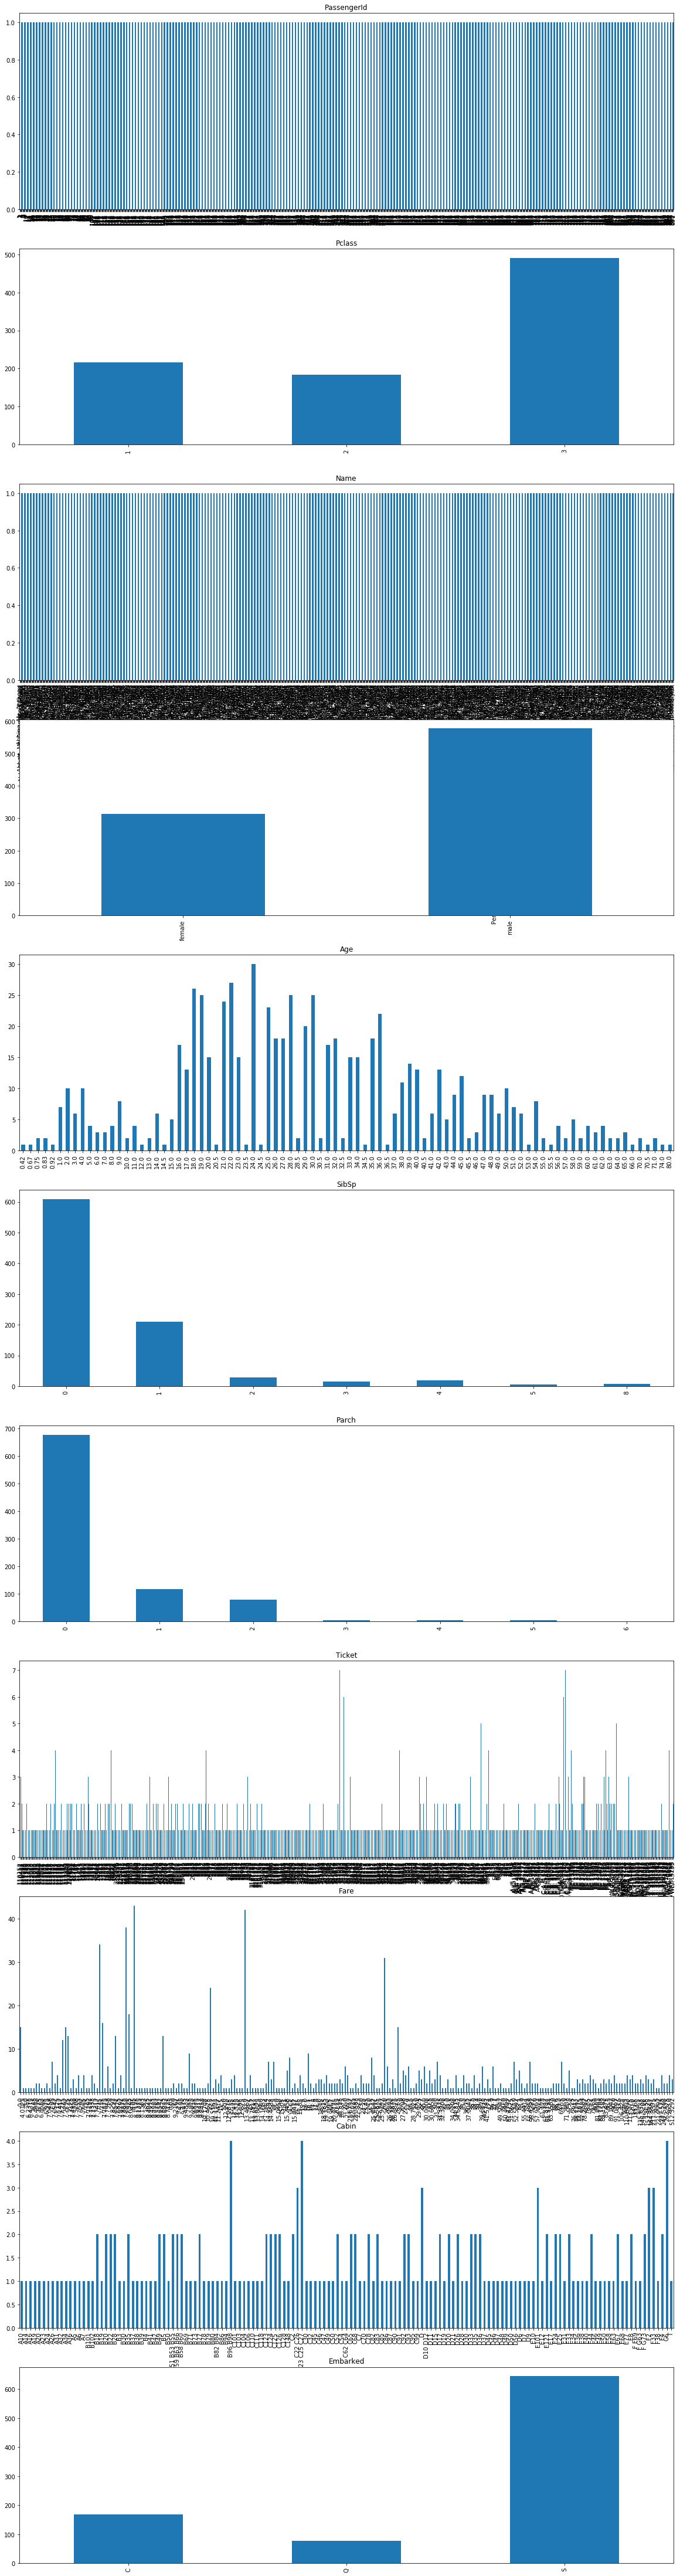

In [18]:
def plot_all_columns(df):
    columns = train.columns
    f, a = plt.subplots(len(columns),1)
    f.set_figheight(80)
    f.set_figwidth(20)
    
    for i, col in enumerate(columns):
        df[col].value_counts().sort_index().plot.bar(title=col, ax=a[i])

plot_all_columns(train)

# Clean data

In [19]:
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import is_string_dtype, is_numeric_dtype

def fill_nan(df):
    # Fill NaN
    for key, val in dict(df.isna().any()).items():
        if not val:
            continue

        if is_numeric_dtype(df[key]):
            df[key].fillna(-1, inplace=True)
        #elif is_string_dtype(df[key]):
        else:
            df[key].fillna('UNK', inplace=True)
    
def transform_non_numeric_columns(df):
    # Non-numeric columns
    le_name = le_sex = le_cabin = le_embarked = LabelEncoder()
    
    df['Age'] = le_name.fit_transform(df['Age'])
    df['Name'] = le_name.fit_transform(df['Name'])
    df['Sex'] = le_sex.fit_transform(df['Sex'])
    df['Cabin'] = le_cabin.fit_transform(df['Cabin'])
    df['Ticket'] = le_cabin.fit_transform(df['Ticket'])
    df['Embarked'] = le_embarked.fit_transform(df['Embarked'])
    return df


fill_nan(train)
train[train['Embarked'].isna()]
#train['Embarked'].fillna('UNK', inplace=True)
train = transform_non_numeric_columns(train)

# Feature engineering

In [20]:
from sklearn.feature_selection import chi2

def chi(df):
    z = zip(df.columns, chi2(df, gt)[0])
    for val in z:
        print(val)

def calculate_statistics(series):
    return {
        'maximum': max(series),
        'minimum': min(series),
        'mean': np.mean(series),
        'std': np.std(series),
        'var': np.var(series)
    }

def calculate_numbers_above(df, key, limit):
    return len(df[df[key] > limit])

chi(train)

('PassengerId', 3.3129340664017617)
('Pclass', 30.873699436634034)
('Name', 435.5689145039796)
('Sex', 92.70244697888427)
('Age', 4.718638693809026)
('SibSp', 2.5818653789895856)
('Parch', 10.097499111810386)
('Ticket', 2871.655465833469)
('Fare', 4518.319090638637)
('Cabin', 573.9258577394589)
('Embarked', 9.755455827573384)


In [21]:
# Round all fare values to closes integer
#train['Fare'] = round(train['Fare'])
#train['Age'] = round(train['Age'])

chi(train)

('PassengerId', 3.3129340664017617)
('Pclass', 30.873699436634034)
('Name', 435.5689145039796)
('Sex', 92.70244697888427)
('Age', 4.718638693809026)
('SibSp', 2.5818653789895856)
('Parch', 10.097499111810386)
('Ticket', 2871.655465833469)
('Fare', 4518.319090638637)
('Cabin', 573.9258577394589)
('Embarked', 9.755455827573384)


{'maximum': 512.3292, 'minimum': 0.0, 'mean': 32.204207968574636, 'std': 49.6655344447741, 'var': 2466.665311685043}
222


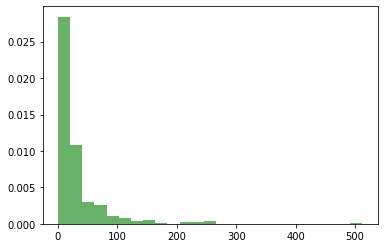

In [22]:
plt.hist(train['Fare'], bins=25, density=True, alpha=0.6, color='g')

print(calculate_statistics(train['Fare']))
print(calculate_numbers_above(train, 'Fare', 31))

#train['Fare'] = train['Fare'].apply(lambda x: 1 if x > 31 else 0)

In [23]:
train = train.drop(columns=['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'])

# Train model

TypeError: 'AxesSubplot' object is not subscriptable

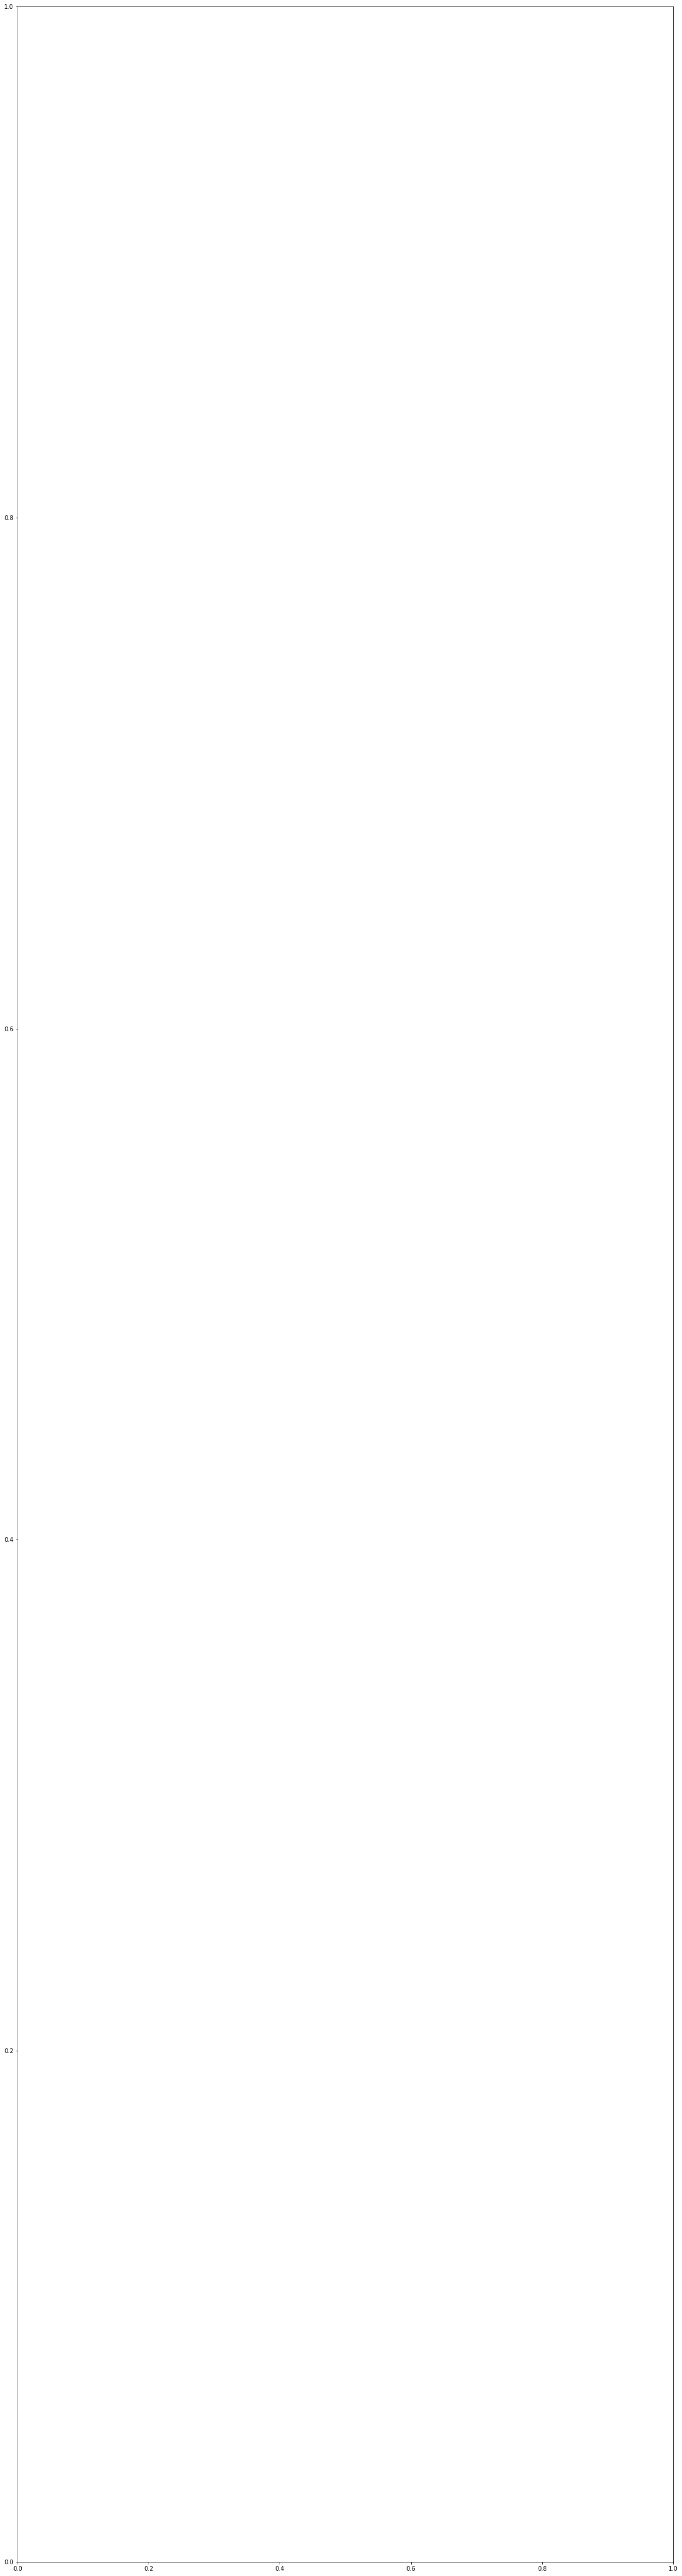

In [24]:
# Inspect data before training
plot_all_columns(train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import sklearn
rfc = RandomForestClassifier()
svm = sklearn.svm.SVC()

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
accuracy = []
for i, indices in enumerate(loo.split(train)):
    print(i)
    train_index, test_index = indices
    model = sklearn.svm.SVC()
    X_train, X_test = train.iloc[train_index], train.iloc[test_index]
    y_train, y_test = gt[train_index], gt[test_index]
    model.fit(X_train, y_train)
    accuracy.append(model.score(X_test, y_test))
    

In [ ]:
sum(accuracy) / len(accuracy)

# Results

SVM, remove ('PassengerId', 'Name', 'Ticket'), round values + Fare filter: 0.6857463524130191

SVM, remove ('PassengerId', 'Name', 'Ticket'), round values: 0.6868686868686869

SVM: remove ('PassengerId', 'Name', 'Ticket'): 0.6868686868686869

SVM: 0.675645342312009

# Create prediction

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(train.drop(columns='Survived'), gt)
predict = rfc.predict(clean_data(test))

In [ ]:
prediction = {'PassengerId': test['PassengerId'], 'Survived': predict}
predict = pandas.DataFrame(prediction)

In [ ]:
print(gender.head())
print(predict.head())

In [ ]:
predict.to_csv('./data/submission.csv', index=False)